In [21]:
import networkx as nx
import random
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle

In [2]:
# import empirical netwrok
em_mat=pd.read_csv('C:/Users/wyw25/thesis/MAT_experiment/2018-02-05.csv', header=None)

In [3]:
# load the nestedness of the empirical netwrok
N_list=[]
Q_list=[]
I_list=[]
I_MQ_list=[]

for i in range(200):
    nestedness=pd.read_csv("C:/Users/wyw25/thesis/2018-02-05/"+str(i)+"/data_structures_NQI_results2018-02-05.csv")
    
    N=nestedness['N'].values[0]
    Q=nestedness['Q'].values[0]
    I=nestedness['I'].values[0]
    I_MQ=nestedness['I_MQ'].values[0]
    
    
    N_list.append(N)
    Q_list.append(Q)
    I_list.append(I)
    I_MQ_list.append(I_MQ)


In [4]:
N_observation=np.mean(N_list)
Q_observation=np.mean(Q_list)
I_observation=np.mean(I_list)
I_MQ_observation=np.mean(I_MQ_list)


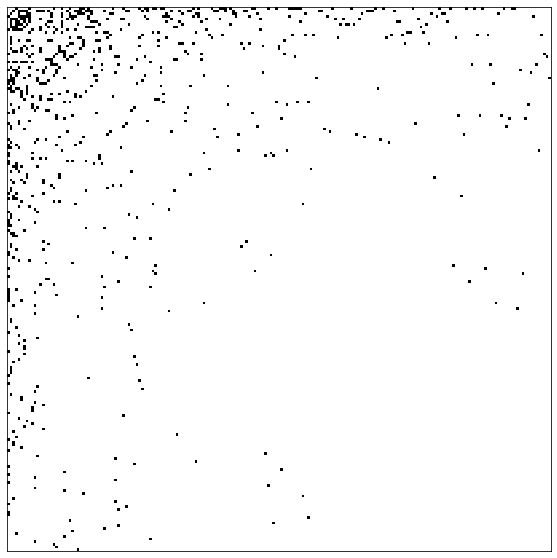

In [32]:
G_empirical=nx.from_numpy_array(np.array(em_mat))
degreeofday=dict(G_empirical.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G_empirical,nodenewlist)

In [33]:
# import the simulated network
# load the dict of dataframes
with open('simulation_200/simulation_200_real.pkl', 'rb') as fp:
    simutable = pickle.load(fp)


In [34]:
# import the computed Q, nodf, IBNestedness of all simulated point

with open('parameter_200/I.pkl', 'rb') as fp:
    I = pickle.load(fp)
    
with open('parameter_200/Q.pkl', 'rb') as fp:
    Q = pickle.load(fp)
    
with open('parameter_200/N.pkl', 'rb') as fp:
    N = pickle.load(fp)
    
with open('parameter_200/I_MQ.pkl', 'rb') as fp:
    I_MQ = pickle.load(fp)


In [35]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_array(G, dtype=bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
 #   fig = pyplot.figure(figsize=(10, 10)) # in inches
 #   pyplot.imshow(adjacency_matrix,
 #                 cmap="Greys",
 #                 interpolation="none")
    fig = plt.figure(figsize=(10, 10))  # in inches
    plt.imshow(adjacency_matrix, cmap="Greys", interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
  #  ax.add_patch(Rectangle((-1, -1), 500, 500, fill=False))
    ax.set_xticks([])
    ax.set_yticks([])

   # ax.tick_params(axis='x', labelsize=15)
   # ax.tick_params(axis='y', labelsize=15)
    
    
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth=1))
            current_idx += len(module)
            
    plt.savefig('figureS_2.pdf')
    plt.show()

In [36]:
#combination1

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k]  
   
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient,Q_index,N_index,I_index

In [31]:
# combination2

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
  #  average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
        
    
    return Q_index,N_index,I_index

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
   # average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
  #  clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return Q_index,N_index,I_index

In [32]:
# combination3

def Compute_properties(G,i,j,k,I,Q,N,I_MQ):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index = Q[i][j][k]  # Replace None with your default value for Q
    N_index = N[i][j][k]   # Replace None with your default value for N
    I_index = I[i][j][k]  # Replace None with your default value for I
  #  I_MQ_index = I_MQ[i][j][k] 
    
    
    
    return average_degree,clustering_coefficient

def Compute_properties_OBSERVATION(G,N_observation,I_observation,Q_observation,I_MQ_observation):
    
    average_degree = sum([val for (node, val) in G.degree()])/float(len(G))
   # average_path_length=nx.average_shortest_path_length(G)
    clustering_coefficient=nx.average_clustering(G)
    
    Q_index=Q_observation
    N_index=N_observation
    I_index=I_observation
   # I_MQ_index=I_MQ_observation   
    
    return average_degree,clustering_coefficient

In [37]:
def likelihood(params, real_data, simulated_data):
    """
    Calculate the likelihood of observing the real data given the parameters.

    Parameters:
    - params: array-like, the parameters (pL_s, pL_d, pNL_nl)
    - real_data: array-like, the real network properties (average_degree, average_path_length, clustering_coefficient)
    - simulated_data: array-like, the simulated network properties for the given parameters
    - uncertainties: array-like, uncertainties for each network property

    Returns:
    - likelihood_value: float, the likelihood value
    """
    # Calculate the squared differences between simulated and real data

    squared_diff = ((simulated_data - real_data) / np.std(simulated_data))**2


    # Calculate the log-likelihood (assuming normal distribution)
    log_likelihood = -0.5 * np.sum(squared_diff)
    likelihood=np.exp(log_likelihood)

    return likelihood



In [38]:
parameter_LIST = {}
for i in tqdm(range(len(simutable))):
    parameter_LIST[i] = {}
    for j in range(len(simutable[1])):
        parameter_LIST[i][j] = {}
        for k in range(len(simutable[1][1])):
            simumat=simutable[i][j][k]
            G_simu=nx.from_numpy_array(np.array(simutable[i][j][k]))
            parameter_simu=np.array(Compute_properties(G_simu,i,j,k,I,Q,N,I_MQ))
            parameter_LIST[i][j][k]=parameter_simu

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [09:27<00:00, 28.38s/it]


In [39]:
# Example usage:
# Replace the following with your actual data and uncertainties
real_data =np.array(Compute_properties_OBSERVATION(G_empirical,N_observation,I_observation,Q_observation,I_MQ_observation))
#uncertainties = np.array([0.2, 0.2, 0.2])
likelihoodlist=[]

compare=0
i_max=0
j_max=0
k_max=0

for i in range(len(simutable)):
    for j in range(len(simutable[1])):
        for k in range(len(simutable[1][1])):           
            simulated_data = parameter_LIST[i][j][k]

            # Replace with the actual parameter values you want to evaluate
            parameters_to_evaluate = np.array([0.5,0.5, 0.5])

            # Calculate the likelihood for the given parameters
            likelihood_value = likelihood(parameters_to_evaluate, real_data, simulated_data)
            
            if np.isnan(likelihood_value):
                likelihood_value=0
            if likelihood_value>compare:
                compare=likelihood_value
                i_max=i
                j_max=j
                k_max=k
                
            
            likelihoodlist.append(likelihood_value)

            print("Likelihood:", likelihood_value)

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.6351128893342286e-172
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Like

Likelihood: 0.0
Likelihood: 1.1829580093726796e-248
Likelihood: 9.358628237035003e-196
Likelihood: 9.932044663155112e-273
Likelihood: 6.842735011848596e-233
Likelihood: 0.0
Likelihood: 3.509302731939617e-164
Likelihood: 2.1950678470806033e-246
Likelihood: 3.7777486045664217e-236
Likelihood: 0.0
Likelihood: 8.839574056735703e-198
Likelihood: 2.4078094552696697e-295
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.173118795131327e-232
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1758141678475646e-242
Likelihood: 1.2580947e-317
Likelihood: 0.0
Likelihood: 1.2756449575336269e-244
Likelihood: 3.0695504196186107e-31
Likelihood: 2.4515584523349932e-291
Likelihood: 8.588481023949692e-24
Likelihood: 1.9527126467780956e-108
Likelihood: 4.933368974210479e-158
Likelihood: 2.4292413788263663e-119
Likelihood: 1.5e-323
Likelihood: 6.537178343433172e-156
Likelihood: 1.5780635478594527e-177
Likelihood: 5.613674234799841e-127
Likelihood: 1.704785475698006e-169
Likelihood: 7.021369700788862e-227
Likelihood

Likelihood: 1.1802798353200782e-47
Likelihood: 2.327315417887416e-39
Likelihood: 1.827123482515736e-49
Likelihood: 4.709278465863743e-66
Likelihood: 2.271624051798436e-34
Likelihood: 1.5779080233114177e-85
Likelihood: 1.0514636978216536e-40
Likelihood: 4.4041685385665843e-32
Likelihood: 1.6740042060042085e-75
Likelihood: 1.5360714271751324e-68
Likelihood: 4.984276168371711e-69
Likelihood: 1.2141974854565287e-73
Likelihood: 1.260379972380939e-58
Likelihood: 1.2849479728803512e-68
Likelihood: 6.761995940306485e-54
Likelihood: 9.198907015707405e-65
Likelihood: 0.008051469836209944
Likelihood: 0.00014971495725022793
Likelihood: 1.9420347230792936e-38
Likelihood: 2.788548051795588e-40
Likelihood: 0.0011794027028250583
Likelihood: 0.0014774535983047596
Likelihood: 6.667501262304921e-07
Likelihood: 8.994685938072257e-52
Likelihood: 0.0018533287575523193
Likelihood: 4.0130241492792935e-68
Likelihood: 1.1410954190103832e-60
Likelihood: 1.9893767866714575e-60
Likelihood: 0.000492422865625341
Lik

Likelihood: 0.8293155497138783
Likelihood: 0.5554871014194666
Likelihood: 0.6620852929423192
Likelihood: 0.13521517990969809
Likelihood: 4.7939941747807506e-08
Likelihood: 0.5425714449508455
Likelihood: 0.48979153508090745
Likelihood: 4.4829099397969575e-08
Likelihood: 2.0555526839101193e-05
Likelihood: 5.62675960776428e-06
Likelihood: 0.5005376500483493
Likelihood: 0.4846903126151457
Likelihood: 0.41729095586018855
Likelihood: 0.4699156368650471
Likelihood: 0.6716188860248061
Likelihood: 0.7951138023969433
Likelihood: 0.31305469372288486
Likelihood: 0.41038833039121275
Likelihood: 0.5664786585147256
Likelihood: 0.3942758352900981
Likelihood: 0.48904776810126804
Likelihood: 0.5528905789918814
Likelihood: 0.360791372050298
Likelihood: 0.03382384865376767
Likelihood: 0.4666274240336739
Likelihood: 1.2158451791648876e-05
Likelihood: 0.005697673874786058
Likelihood: 1.113119845485958e-06
Likelihood: 9.045631269761876e-06
Likelihood: 0.0017428093387348808
Likelihood: 0.001626981648572392
Li

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0


Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1511560129419727e-294
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.038227691657065e-206
Likelihood: 1.0081510725650482e-278
Likelihood: 0.0
Likelihood: 1.5506118860619367e-233
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.72961136586964e-309
Likelihood: 3.503143056790886e-288
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.8216672994852706e-267
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.852470254100342e-303
Likelihood: 6.10658087462609e-292
Likelihood: 0.0
Likelihood: 3.5730269662407603e-270
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelih

Likelihood: 6.927357140470761e-52
Likelihood: 0.0822201916761123
Likelihood: 2.3794943864983043e-32
Likelihood: 5.817262468482724e-46
Likelihood: 5.23977708837744e-38
Likelihood: 0.16514001823250696
Likelihood: 0.007472813188190575
Likelihood: 7.588645278835702e-28
Likelihood: 7.478309311443037e-26
Likelihood: 4.1702344689799717e-26
Likelihood: 4.0416622259434815e-38
Likelihood: 1.2367911818865511e-29
Likelihood: 0.004392946560456159
Likelihood: 1.5585596035358966e-30
Likelihood: 0.11574028557195916
Likelihood: 3.053468482390994e-37
Likelihood: 0.6795988350549885
Likelihood: 0.029647412491515722
Likelihood: 0.03818822658848013
Likelihood: 1.5094848185367976e-43
Likelihood: 0.5847682807262299
Likelihood: 0.012125622705574742
Likelihood: 0.04198122590002974
Likelihood: 1.2126413238966472e-41
Likelihood: 9.993424506990463e-41
Likelihood: 0.011539183357548582
Likelihood: 1.8129807277180483e-48
Likelihood: 0.10018551792016855
Likelihood: 0.030560901406864096
Likelihood: 0.04002191044664425


Likelihood: 0.06451231942001134
Likelihood: 0.06199320199919922
Likelihood: 0.06250061839716031
Likelihood: 0.061669671562213535
Likelihood: 0.06341390583133209
Likelihood: 0.06225468406315635
Likelihood: 0.060107640923724635
Likelihood: 0.06251567936815956
Likelihood: 0.06205253891384002
Likelihood: 0.06134301676108136
Likelihood: 0.06245566169898042
Likelihood: 0.06189507758334846
Likelihood: 0.06202974953132568
Likelihood: 0.061674570039327456
Likelihood: 0.0622710117821889
Likelihood: 0.06385934266975336
Likelihood: 0.060363583189837165
Likelihood: 0.06379945111343008
Likelihood: 0.06195943570639328
Likelihood: 0.06306989295288988
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelih

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.179882404368058e-215
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.0683020

Likelihood: 2.3017716213159007e-28
Likelihood: 2.299362037270144e-19
Likelihood: 0.690376957097264
Likelihood: 0.04536808032556595
Likelihood: 0.01896737419518948
Likelihood: 0.009698552834424074
Likelihood: 0.0034526704841798374
Likelihood: 4.1657522648232755e-24
Likelihood: 9.687730852502608e-05
Likelihood: 0.41023818575299575
Likelihood: 0.5996519951746454
Likelihood: 2.0856172098454916e-25
Likelihood: 7.625363291625801e-52
Likelihood: 0.0030453928760437077
Likelihood: 4.557691748839456e-31
Likelihood: 1.3859871132643984e-19
Likelihood: 0.012571773560168517
Likelihood: 2.586341715002311e-27
Likelihood: 2.2213245635769935e-17
Likelihood: 1.2478731477681366e-30
Likelihood: 1.5148677835837292e-25
Likelihood: 4.842006857083445e-38
Likelihood: 4.165308517629513e-30
Likelihood: 7.103647245699177e-16
Likelihood: 9.39774161660449e-24
Likelihood: 4.090350116707432e-11
Likelihood: 1.91610168280248e-14
Likelihood: 8.560349793121919e-26
Likelihood: 4.8852822535878774e-27
Likelihood: 2.461550151

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.7379613234337794e-293
Likelihood: 0.0
Likelihood: 8.000173e-318
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.814700454711043e-202
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0065077539111115e-188
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.40803075416137e-202
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.5817991973500576e-93
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.

Likelihood: 0.0017038278825815538
Likelihood: 1.00308017942435e-24
Likelihood: 0.66160905770638
Likelihood: 1.0662950830996033e-17
Likelihood: 1.0802454211982475e-32
Likelihood: 1.9750796163330778e-28
Likelihood: 1.0817993582465937e-06
Likelihood: 1.4703874760779323e-09
Likelihood: 9.130274907877174e-28
Likelihood: 1.1523881161034754e-19
Likelihood: 3.495226940108017e-11
Likelihood: 1.3048334545753926e-24
Likelihood: 2.7312222991653557e-29
Likelihood: 1.7619556282255655e-13
Likelihood: 1.5782265274861709e-27
Likelihood: 3.5149402253316965e-13
Likelihood: 2.1847808274050286e-31
Likelihood: 5.808039518196763e-20
Likelihood: 5.348122325715254e-26
Likelihood: 0.03620083773521606
Likelihood: 6.197080489073732e-29
Likelihood: 3.2538083029564294e-13
Likelihood: 0.17190818901479119
Likelihood: 8.189652014837291e-23
Likelihood: 4.6141152355989796e-32
Likelihood: 5.5629887877230036e-24
Likelihood: 2.8780355557910824e-18
Likelihood: 6.544805770357207e-14
Likelihood: 2.584370424278701e-21
Likeliho

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 2.4081580819628385e-78
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.814349530255682e-61
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.237862020302566e-304
Likelihood: 0.0
Likelihood: 3.2465983160302255e-237
Likelihood: 0.0
Likelihood: 9.389518731276839e-120
Likelihood: 8.3743601729358975e-255
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.607888862194567e-47
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likeli

Likelihood: 0.1403608232456797
Likelihood: 4.6814915726592674e-35
Likelihood: 0.2777061875162953
Likelihood: 0.10353425340272884
Likelihood: 2.7232114565843183e-43
Likelihood: 0.24327947193834137
Likelihood: 8.578103054314532e-24
Likelihood: 1.9734014065552338e-33
Likelihood: 2.9153298768913733e-12
Likelihood: 1.2097026129216088e-30
Likelihood: 4.9672573952313146e-24
Likelihood: 2.7323031480888015e-18
Likelihood: 2.5208022265645113e-28
Likelihood: 3.843345857807801e-16
Likelihood: 6.903028133480557e-14
Likelihood: 2.4903561637668874e-21
Likelihood: 4.2021832473383063e-39
Likelihood: 7.519247303554159e-26
Likelihood: 1.4027192242461853e-20
Likelihood: 2.3798178880420647e-22
Likelihood: 0.10558911242101711
Likelihood: 6.073220912805656e-28
Likelihood: 3.49948403662231e-28
Likelihood: 6.657170671829355e-32
Likelihood: 3.762468720789036e-33
Likelihood: 3.8297696423850686e-23
Likelihood: 1.0714752383003456e-27
Likelihood: 1.2379160448022698e-31
Likelihood: 0.12880047741661058
Likelihood: 1.

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 2.629838407498987e-278
Likelihood: 0.0
Likelihood: 4.801288659506138e-79
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.206089549786032e-293
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.460276128297698e-145
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.621748497198503e-165
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0959528379843943e-134
Likelihood: 1.3134701140149998e-217
Li

Likelihood: 4.0846915738272825e-31
Likelihood: 0.12890134076219134
Likelihood: 0.002382308548163187
Likelihood: 0.6152201797765414
Likelihood: 1.0617527374814474e-12
Likelihood: 1.2372221754138761e-39
Likelihood: 5.3034589886571645e-15
Likelihood: 1.0097786820767066e-15
Likelihood: 1.2961657170859305e-22
Likelihood: 1.1636254815537017e-19
Likelihood: 3.4736062176267625e-12
Likelihood: 3.6559741697784325e-07
Likelihood: 5.069478836576732e-22
Likelihood: 1.2319651392608135e-17
Likelihood: 1.2901221950716338e-17
Likelihood: 1.6969076995045804e-12
Likelihood: 5.9280319923335664e-24
Likelihood: 0.010534910644901092
Likelihood: 1.817098341864038e-36
Likelihood: 6.82926272900381e-23
Likelihood: 4.1506841392761464e-34
Likelihood: 3.006297743080681e-32
Likelihood: 3.710517825606928e-26
Likelihood: 0.15840219287317872
Likelihood: 2.6132253243787785e-48
Likelihood: 6.910143695508427e-28
Likelihood: 1.473524472546418e-38
Likelihood: 3.283357401407581e-26
Likelihood: 0.010089177039282256
Likelihood

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.404016638674851e-140
Likelihood: 0.0
Likelihood: 2.385439087347897e-231
Likelihood: 0.0
Likelihood: 1.2638959657135038e-172
Likelihood: 0.0
Likelihood: 2.4694852449661903e-131
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.5095408465262312e-297
Likeli

Likelihood: 5.767476724117016e-53
Likelihood: 1.5081731249446713e-73
Likelihood: 3.435321263410922e-68
Likelihood: 0.03813279282334726
Likelihood: 1.8829414225496063e-53
Likelihood: 0.019259457969787282
Likelihood: 2.0574590450880596e-58
Likelihood: 0.025513957927062503
Likelihood: 6.02209897261161e-41
Likelihood: 2.3115053026367243e-61
Likelihood: 7.377441313824575e-60
Likelihood: 0.0013173102392721682
Likelihood: 8.279857822244641e-62
Likelihood: 1.0638515148020353e-41
Likelihood: 0.003081078409587331
Likelihood: 1.595829724963517e-59
Likelihood: 0.0042671030841927625
Likelihood: 0.03058511432571346
Likelihood: 3.114399579952667e-60
Likelihood: 0.008083675643458688
Likelihood: 0.005331482882933713
Likelihood: 0.028743240867053436
Likelihood: 1.818405196085171e-77
Likelihood: 0.010696081968404754
Likelihood: 0.034295607845568545
Likelihood: 0.0008340803548516802
Likelihood: 0.005346745270700637
Likelihood: 3.391391776875569e-67
Likelihood: 0.02418366197089982
Likelihood: 1.91446041253

Likelihood: 0.06162857339570084
Likelihood: 0.06275406822399603
Likelihood: 0.06430081512323121
Likelihood: 0.06379733955961954
Likelihood: 0.06335558798349977
Likelihood: 0.0626446997966114
Likelihood: 0.06214607058629275
Likelihood: 0.062481857368517545
Likelihood: 0.06349967844186455
Likelihood: 0.06388286890256159
Likelihood: 0.06334165293794101
Likelihood: 0.06391421842790507
Likelihood: 0.06377951609456617
Likelihood: 0.06372709437668993
Likelihood: 0.06374691527500817
Likelihood: 0.06338714767173732
Likelihood: 0.06217309063951397
Likelihood: 0.06314172772282509
Likelihood: 0.06097507632757875
Likelihood: 0.062488924252293125
Likelihood: 0.06248915464818657
Likelihood: 0.06332305185241992
Likelihood: 0.06402839827917961
Likelihood: 0.0641192963193596
Likelihood: 0.0633129595034447
Likelihood: 0.06193591871717177
Likelihood: 0.06183551989442963
Likelihood: 0.06266321314486042
Likelihood: 0.06215499827980808
Likelihood: 0.06293089526266117
Likelihood: 0.0626194704497873
Likelihood

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.961116949256687e-126
Likelihood: 6.595658482213191e-79
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.868480840350938e-247
Likelihood: 1.1968735960791757e-123
Likelihood: 9.109003367578492e-192
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.11211628804104e-297
Likelihood: 0.0
Likelihood: 0.0
Likelih

Likelihood: 0.1055928407176923
Likelihood: 2.5346197648819327e-26
Likelihood: 2.5366002831481462e-21
Likelihood: 0.2776318265945237
Likelihood: 0.01435734880605066
Likelihood: 0.00015700612386944723
Likelihood: 0.04252984849612465
Likelihood: 0.1810316810283566
Likelihood: 1.3348517645733374e-18
Likelihood: 1.2449749607846666e-25
Likelihood: 2.198391575287421e-24
Likelihood: 1.2670815074350224e-38
Likelihood: 0.014285083220445473
Likelihood: 0.11912989141484064
Likelihood: 7.420790773534138e-17
Likelihood: 1.9511400182783238e-30
Likelihood: 1.226387074551131e-06
Likelihood: 0.673382814420537
Likelihood: 0.02313677774321279
Likelihood: 0.000912387744727294
Likelihood: 0.041765957626193236
Likelihood: 0.18804381261266867
Likelihood: 0.010808343979800702
Likelihood: 0.04003834769824287
Likelihood: 3.2471970358078336e-27
Likelihood: 1.0174106384163934e-18
Likelihood: 0.10949433982705649
Likelihood: 3.977843717875838e-09
Likelihood: 1.3895463454751656e-17
Likelihood: 6.079352935885178e-34
L

Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.67966640234942e-199
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.9563075184975942e-214
Likelihood: 2.372825988722523e-210
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.1084228292938928e-227
Likelihood: 0.0
Likelihood: 1.08481287e-314
Likelihood: 1.61668e-318
Likeli

Likelihood: 1.1739292423613322e-42
Likelihood: 4.5069911168758675e-23
Likelihood: 1.4278698101499806e-06
Likelihood: 3.227345629093595e-17
Likelihood: 1.48156348952469e-17
Likelihood: 3.328867927135719e-29
Likelihood: 3.546963025884034e-39
Likelihood: 6.498115575439068e-25
Likelihood: 1.943570194335223e-36
Likelihood: 6.304067321902434e-16
Likelihood: 2.432861434036885e-35
Likelihood: 3.991096443808825e-31
Likelihood: 9.75766693899832e-22
Likelihood: 1.3009133689575464e-28
Likelihood: 4.276941655128903e-42
Likelihood: 8.76097986618368e-25
Likelihood: 0.1261728200478858
Likelihood: 3.950692658943097e-14
Likelihood: 1.1651575681450558e-31
Likelihood: 6.72937740429119e-19
Likelihood: 0.11417744418973548
Likelihood: 1.8607717032403888e-30
Likelihood: 0.019646452499914088
Likelihood: 0.019311618571684123
Likelihood: 4.6879411703410076e-20
Likelihood: 0.09363530053891253
Likelihood: 1.4154052316819493e-19
Likelihood: 7.554873408521068e-25
Likelihood: 4.5515625034049885e-20
Likelihood: 0.0209

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.616916342513538e-246
Likelihood: 4.439343873426498e-84
Likelihood: 1.0535263768756631e-267
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.419003695446875e-297
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.603714677243931e-218
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihoo

Likelihood: 1.5978733046505025e-14
Likelihood: 8.109478562482524e-36
Likelihood: 9.478964221371674e-56
Likelihood: 2.0355554326143753e-39
Likelihood: 0.0649785992407437
Likelihood: 1.0038119244575584e-34
Likelihood: 0.011498041106470352
Likelihood: 3.162713252286601e-09
Likelihood: 2.6404688657787867e-49
Likelihood: 7.422599802141307e-43
Likelihood: 1.0022312650973563e-05
Likelihood: 0.03236451824730329
Likelihood: 0.0031648615497960352
Likelihood: 2.170026611631034e-44
Likelihood: 0.0022810445595419044
Likelihood: 0.05936639243532594
Likelihood: 1.7053483821196134e-60
Likelihood: 0.04091851434174475
Likelihood: 1.811895095908716e-08
Likelihood: 0.0038041368762178635
Likelihood: 0.0005825609310445029
Likelihood: 0.012756360251032313
Likelihood: 0.002105113722696065
Likelihood: 0.022164403886683573
Likelihood: 0.002947557965785381
Likelihood: 0.04404732790331459
Likelihood: 0.5889338276155455
Likelihood: 9.553617531148565e-05
Likelihood: 4.7267241729410694e-42
Likelihood: 6.473589201357

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likeli

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.225950716367212e-265
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.8494415089179655e-155
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.5470208112287906e-297
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.715692355945821

Likelihood: 0.0006755209237838784
Likelihood: 0.014794646317293086
Likelihood: 4.8907752886740565e-33
Likelihood: 6.377349022082711e-55
Likelihood: 2.4620792513591403e-29
Likelihood: 2.782853835043542e-44
Likelihood: 0.01998167221087346
Likelihood: 0.03171608410669404
Likelihood: 0.014053890409080377
Likelihood: 3.313766026432115e-45
Likelihood: 2.8847903126841975e-05
Likelihood: 0.1416846383412096
Likelihood: 3.8841037299838245e-40
Likelihood: 0.007483955299524418
Likelihood: 0.0002771813342050926
Likelihood: 3.0106203079669554e-40
Likelihood: 1.733686208270111e-22
Likelihood: 3.692838513982224e-11
Likelihood: 4.056629608850202e-11
Likelihood: 7.367621413650071e-09
Likelihood: 1.0685727813504879e-12
Likelihood: 1.9572110661173587e-20
Likelihood: 7.739542519289583e-13
Likelihood: 1.0147221996789727e-36
Likelihood: 2.4003340533060293e-14
Likelihood: 1.00874600626871e-43
Likelihood: 1.9965256231317193e-41
Likelihood: 6.250629424441929e-57
Likelihood: 1.167396270161798e-59
Likelihood: 1.4

Likelihood: 0.061823121817095164
Likelihood: 0.06287467043292477
Likelihood: 0.06297128323052367
Likelihood: 0.06264784378597721
Likelihood: 0.06087921648718096
Likelihood: 0.06184670598878849
Likelihood: 0.062060376578374286
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Like

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.3680671573556384e-207
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.4149456734534403e-69
Likelihood: 0.0
Likelihood: 4.3564429855810694e-169
Likelihood: 0.0
Likelihood: 2.1752823143199023e-223
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.536104818315357e-90
Likelihood: 0.0
Likelihood: 1.5869355027893861e-128
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.8655003729430937e-33
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.941537885552745e-245
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0

Likelihood: 3.154654831620161e-17
Likelihood: 0.29255577011289674
Likelihood: 7.303443122943205e-16
Likelihood: 0.08425706952949506
Likelihood: 2.6377970831891142e-23
Likelihood: 0.003054479523726787
Likelihood: 0.043620108085868484
Likelihood: 0.18237526547155897
Likelihood: 2.8866249845358796e-16
Likelihood: 6.60742243090168e-08
Likelihood: 9.402716016918411e-07
Likelihood: 2.648302763758505e-09
Likelihood: 1.080955004536677e-05
Likelihood: 7.549615022061778e-11
Likelihood: 3.607139425994973e-07
Likelihood: 5.0009558112659675e-06
Likelihood: 4.1278409298059526e-07
Likelihood: 3.563550831240805e-07
Likelihood: 0.006896292409411183
Likelihood: 1.4033912189875951e-07
Likelihood: 3.299442868962098e-08
Likelihood: 1.1237607717737306e-09
Likelihood: 8.090249112232706e-05
Likelihood: 2.6400615574778085e-12
Likelihood: 2.1014547861980988e-11
Likelihood: 6.106372719839138e-07
Likelihood: 4.6450430162454206e-07
Likelihood: 7.559575063111698e-09
Likelihood: 1.208169196220045e-17
Likelihood: 0.0

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 2.4081580819628385e-78
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 2.4081580819628385e-78
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 1.6884702751639386e-99
Likelihood: 0
Likelihood: 0.0
Likelihood: 2.4081580819628385e-78
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0


Likelihood: 1.0559962047074097e-294
Likelihood: 0.0
Likelihood: 1.3068219694889995e-35
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.1239206261814965e-185
Likelihood: 0.0
Likelihood: 8.533922656456e-312
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.57232727518833e-188
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7e-323
Likelihood: 4.172659090685091e-298
Likelihood: 0.0
Likelihood: 6.108061055701618e-288
Likelihood: 0.0
Likelihood: 1.9440302549482212e-274
Likelihood: 4.4539372827923836e-122
Likelihood: 2.2790117731302286e-61
Likelihood: 1.433864813569385e-233
Likelihood: 0.0
Likelihood: 3.1664514835083153e-46
Likelihood: 2.9209177454173024e-105
Likelihood: 0.0
Likelihood: 3.334932709682306e-55
Likelihood: 8.1509987811048e-74
Likelihood: 0.0
Likelihood: 3.02696935429308e-73
Likelihood: 1.167502482624447e-126
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.589776966525518e-209
Likelihood: 1.9755623061252937e-175
Likelihood: 9.57

Likelihood: 7.546329968480982e-14
Likelihood: 1.7439245109367e-14
Likelihood: 0.33722654555438525
Likelihood: 0.17840231445007293
Likelihood: 0.0281063378398427
Likelihood: 6.018421547445398e-06
Likelihood: 0.7968497366849838
Likelihood: 5.678324373600343e-05
Likelihood: 2.1180857262269844e-14
Likelihood: 0.7640543063618316
Likelihood: 0.0912206067181444
Likelihood: 1.9400211821889234e-29
Likelihood: 0.29539768136178846
Likelihood: 0.0996203460321385
Likelihood: 2.687581196440485e-15
Likelihood: 0.08496540223539635
Likelihood: 4.192509737532663e-06
Likelihood: 0.03377564423401708
Likelihood: 4.943649090223247e-08
Likelihood: 1.9811611575063688e-11
Likelihood: 0.00035642666943352057
Likelihood: 5.6667464040544545e-08
Likelihood: 7.571004906640693e-12
Likelihood: 3.5372145646171236e-05
Likelihood: 0.0974278972560092
Likelihood: 0.006740632143861791
Likelihood: 2.559975183240676e-11
Likelihood: 2.4096535968566887e-08
Likelihood: 3.7154454327968425e-05
Likelihood: 0.0340065020761248
Likeli

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.81961766761501e-232
Likelihood: 0.0
Likelihood: 2.284724971482148e-249
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.3261054894659618e-231
Likelihood: 0.0
Likelihood: 1.5498426237987603e-248
Likelihood: 3.070558172173126e-190
Likelihood: 1.951878298244163e-275
Likelihood: 8.471896572558832e-33
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.7238424531302863e-211
Likelihood: 0.0
Likelihood: 4.084955675626149e-42
Likelihood: 3.0916746385892644e-46
Likelihood: 6.717898651818415e-213
Likelihood: 7.792680766971765e-137
Likelihood: 1.9241219316130554e-201
Likelihood: 2.420712370231495e-166
Likelihood: 8.488548551393535e-244
Likelihood: 2.5761272418265505e-173
Likelihood: 0.0
Likelihood: 1.9366584626148782e-126
Likelihood: 2.7687667132396824e-229
Likelihood: 4.0258631028529825e-265
Likelihood: 1.1078351116347624e-277
Likelihood: 2.4209626310856357e-297
Likelihood: 9.016011648465886e-217

Likelihood: 2.9773645352612276e-14
Likelihood: 4.023703059303748e-08
Likelihood: 9.695379736787305e-09
Likelihood: 6.096506768913891e-08
Likelihood: 0.0069190798529304605
Likelihood: 0.8281195298555799
Likelihood: 0.6874332963607509
Likelihood: 0.12564090227665148
Likelihood: 0.7829580078232524
Likelihood: 0.5320462776757116
Likelihood: 0.7748927542376041
Likelihood: 1.368072350945295e-06
Likelihood: 0.01108175118509986
Likelihood: 3.878180143623951e-05
Likelihood: 0.003601715695438788
Likelihood: 0.052047986471616674
Likelihood: 0.15117999184838252
Likelihood: 0.13276604079886395
Likelihood: 0.012063068863444654
Likelihood: 0.0800257790643914
Likelihood: 0.0038313499499895674
Likelihood: 0.023567882639954157
Likelihood: 0.20412381654804782
Likelihood: 0.037320484839201876
Likelihood: 4.4822736948646926e-07
Likelihood: 0.0009949519581097265
Likelihood: 0.0010007935732723983
Likelihood: 0.00024402439400344203
Likelihood: 0.007773726769228244
Likelihood: 0.0181584786015273
Likelihood: 3.

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 1.9452222176408066e-25

Likelihood: 5.365832998898795e-75
Likelihood: 0.0
Likelihood: 1.1353635546779061e-284
Likelihood: 1.780418958431057e-100
Likelihood: 3.355604531372123e-147
Likelihood: 4.7720554185674245e-167
Likelihood: 4.25595729196971e-79
Likelihood: 7.048334909324995e-160
Likelihood: 6.671108372717405e-242
Likelihood: 7.115276059948209e-178
Likelihood: 1.0700769495610753e-83
Likelihood: 0.0
Likelihood: 2.426026993783063e-256
Likelihood: 0.0
Likelihood: 4.402204581613182e-251
Likelihood: 2.0937890079042292e-228
Likelihood: 6.099556299179967e-233
Likelihood: 2.6855201495178338e-207
Likelihood: 1.7791963436962712e-232
Likelihood: 5.0711421687540295e-105
Likelihood: 5.517087086293025e-293
Likelihood: 2.2295288486662063e-255
Likelihood: 1.3637349208464406e-171
Likelihood: 0.0
Likelihood: 7.51280893299744e-230
Likelihood: 2.7162224073849975e-265
Likelihood: 7.71117273145637e-186
Likelihood: 5.017627157530964e-202
Likelihood: 1.247014459401368e-253
Likelihood: 6.526656921398106e-21
Likelihood: 2.635213736

Likelihood: 0.0015597214462790944
Likelihood: 7.833134720737063e-07
Likelihood: 0.0001869136731266518
Likelihood: 1.5367465171502936e-07
Likelihood: 0.5185882928456514
Likelihood: 6.062317393197237e-08
Likelihood: 6.757050111824935e-05
Likelihood: 0.0005285047104842038
Likelihood: 0.030113527772512638
Likelihood: 8.46728004821508e-05
Likelihood: 0.04650892217807661
Likelihood: 1.1367473414944292e-06
Likelihood: 0.024205123423224877
Likelihood: 0.0002973363039703101
Likelihood: 2.8773762618466276e-06
Likelihood: 6.393255395078848e-08
Likelihood: 0.010171681632026749
Likelihood: 0.00043167190654435223
Likelihood: 0.047885142821247555
Likelihood: 3.569962454159365e-07
Likelihood: 0.2875499641783822
Likelihood: 0.43517868061091497
Likelihood: 0.3320830670455669
Likelihood: 1.8462373525099487e-08
Likelihood: 0.0016793736161224721
Likelihood: 2.2393011606292018e-06
Likelihood: 6.943154811524085e-05
Likelihood: 0.0765769697121473
Likelihood: 9.009528741924441e-06
Likelihood: 0.436332031082301

Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 1.3088912718163081e-99
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood:

Likelihood: 1.2197907287784666e-116
Likelihood: 9.278408063659269e-185
Likelihood: 1.9305409551546335e-219
Likelihood: 2.3810315842869257e-111
Likelihood: 1.6143625650213777e-96
Likelihood: 0.0
Likelihood: 1.1968805366192175e-106
Likelihood: 0.0
Likelihood: 5.324799108507083e-97
Likelihood: 1.8080057256627566e-173
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 3.1776918064062e-215
Likelihood: 7.933781523471987e-163
Likelihood: 0.0
Likelihood: 9.147026801715764e-68
Likelihood: 0.0
Likelihood: 1.8978918619574417e-68
Likelihood: 6.063166448754309e-289
Likelihood: 3.1245808229996223e-274
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.0644884055439698e-217
Likelihood: 0.0
Likelihood: 8.779781767908081e-248
Likelihood: 0.0
Likelihood: 5.71974827778557e-265
Likelihood: 0.0
Likelihood: 1.8968393801182035e-79
Likelihood: 2.6177942721627713e-293
Likelihood: 2.0212973537639037e-286
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 5.548283825149553e-187
Likelihood: 5.464713666951357e-240
Likelihood: 2.9425

Likelihood: 2.2083669243282668e-12
Likelihood: 0.014682852253717694
Likelihood: 0.16602391121431387
Likelihood: 0.10681576188753575
Likelihood: 0.40890644776680724
Likelihood: 0.5566531863763085
Likelihood: 0.3677873702532337
Likelihood: 0.3448639705971883
Likelihood: 5.9867706706719553e-05
Likelihood: 0.02978044664652439
Likelihood: 0.01950877336429367
Likelihood: 0.0020419720008671475
Likelihood: 0.02435789217200644
Likelihood: 0.4730310522337057
Likelihood: 0.004338848905786106
Likelihood: 0.03526446139475154
Likelihood: 0.00028530957580978514
Likelihood: 0.0014202761249515023
Likelihood: 0.12576970097136045
Likelihood: 8.160455795615833e-05
Likelihood: 2.494869290514052e-05
Likelihood: 0.00010352129279075484
Likelihood: 0.0899158742783928
Likelihood: 0.0008731797851744749
Likelihood: 0.5365356726390671
Likelihood: 3.820104869566879e-08
Likelihood: 2.213304771777793e-05
Likelihood: 0.1066652464048376
Likelihood: 0.012548667747659207
Likelihood: 0.005619722924404264
Likelihood: 0.012

Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likeli

Likelihood: 1.1734627486794993e-230
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.2530453288344747e-293
Likelihood: 0.0
Likelihood: 1.9717384438026013e-246
Likelihood: 5.966630210234944e-214
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.5381582180893734e-234
Likelihood: 0.0
Likelihood: 2.8555272029964826e-252
Likelihood: 0.0
Likelihood: 7.287726396e-315
Likelihood: 9.740866434384707e-235
Likelihood: 3.613509673277435e-224
Likelihood: 0.0
Likelihood: 5.185670695888998e-56
Likelihood: 7.680374253391333e-236
Likelihood: 1.4323953623967162e-147
Likelihood: 1.2374892690373083e-159
Likelihood: 9.165957226672021e-52
Likelihood: 1.0656020830133772e-288
Likelihood: 2.532517671359161e-278
Likelihood: 4.380544276289519e-116
Likelihood: 1.5613325527661728e-97
Likelihood: 0.0
Likelihood: 1.0991396624506265e-245
Likelihood: 5.615356030656245e-193
Likelihood: 1.16e-321
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.001433482763192e-107
Likelihood: 3.324353652026747e-142
Likelihood: 0.0

Likelihood: 0.34694144446721564
Likelihood: 0.5823133337342545
Likelihood: 0.4097892507348708
Likelihood: 0.027116035162420452
Likelihood: 0.003298467646961288
Likelihood: 0.17449879675451951
Likelihood: 0.05490019287996568
Likelihood: 0.20359211521093037
Likelihood: 0.878153365928739
Likelihood: 0.3394211022900927
Likelihood: 0.011951587667709051
Likelihood: 0.8774970293533664
Likelihood: 0.0011998850084781057
Likelihood: 0.08706506869305843
Likelihood: 0.019476423254822104
Likelihood: 8.100930415460117e-07
Likelihood: 0.37761711575511714
Likelihood: 2.2879443412608526e-05
Likelihood: 0.006952291344948777
Likelihood: 0.19382950106901561
Likelihood: 6.827597041614318e-06
Likelihood: 0.05873647229728082
Likelihood: 0.0006659991387524431
Likelihood: 0.474465607995222
Likelihood: 3.6654217650051717e-06
Likelihood: 7.888846144633965e-07
Likelihood: 0.0015236812387351979
Likelihood: 0.00836456240583604
Likelihood: 0.05410783461690801
Likelihood: 0.0722729609297083
Likelihood: 0.610910566259

Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 2.4081580819628385e-78
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.4081580819628385e-78
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0690381314153726e-198
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 4.5547173071974535e-100
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0


Likelihood: 6.3287965816523255e-53
Likelihood: 5.22298644797339e-142
Likelihood: 3.8195653266283324e-141
Likelihood: 2.873115372369045e-124
Likelihood: 2.2429760343991755e-15
Likelihood: 4.626152961423153e-53
Likelihood: 2.263787214593914e-127
Likelihood: 2.660310398566569e-111
Likelihood: 7.850022699501619e-200
Likelihood: 2.4883790527944244e-17
Likelihood: 6.706665911725691e-201
Likelihood: 1.550059865064953e-102
Likelihood: 5.658281512762724e-132
Likelihood: 2.15226843218489e-152
Likelihood: 2.0526199770985444e-218
Likelihood: 5.46962797637078e-51
Likelihood: 4.813923261620531e-142
Likelihood: 1.0638036585389246e-250
Likelihood: 1.4673423542320315e-142
Likelihood: 2.1354916153719724e-250
Likelihood: 4.731456649028199e-156
Likelihood: 1.2320728660352501e-24
Likelihood: 9.191237970924213e-187
Likelihood: 0.0
Likelihood: 9.53742125741689e-16
Likelihood: 2.104007713650815e-241
Likelihood: 6.225678458878586e-141
Likelihood: 1.9055367096199617e-120
Likelihood: 1.144902399672203e-19
Likeli

Likelihood: 0.5903110521307382
Likelihood: 0.003957127893299
Likelihood: 0.35938431869266185
Likelihood: 0.8648400678228444
Likelihood: 0.33424521192123086
Likelihood: 0.029005270666741002
Likelihood: 0.03547797517752241
Likelihood: 0.8687299681356442
Likelihood: 0.4628516372648428
Likelihood: 0.12703333862740232
Likelihood: 0.7576951933719572
Likelihood: 0.6070538043734077
Likelihood: 0.001534356641353775
Likelihood: 0.016427267258591026
Likelihood: 0.019525945570585717
Likelihood: 0.0008718819054586397
Likelihood: 0.6951417161687171
Likelihood: 0.008124053304017533
Likelihood: 0.060852165925987155
Likelihood: 0.06117900579926051
Likelihood: 0.7461153247609816
Likelihood: 0.8841358364289864
Likelihood: 0.043945004172629316
Likelihood: 0.6366629796265173
Likelihood: 0.8478613351535859
Likelihood: 0.6637142143220658
Likelihood: 0.8707315196018828
Likelihood: 0.8857378284431531
Likelihood: 0.4795104800213372
Likelihood: 0.8351974355516035
Likelihood: 0.9234590555991455
Likelihood: 0.9177

Likelihood: 0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 8.935420169583492e-84
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 9.514471747917646e-79
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.0552138036344091e-97
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 2.828640102490308e-81
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 6.998984061669485e-205
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 1.2984885e-316
Likelihood: 0.0
Likelihood: 7.22755

Likelihood: 4.0113866021024793e-19
Likelihood: 9.593602460801768e-08
Likelihood: 5.874166691268288e-07
Likelihood: 1.1959342448767118e-96
Likelihood: 0.0012648506649788915
Likelihood: 2.086809144883012e-05
Likelihood: 0.00012081301527745921
Likelihood: 5.376510427211646e-05
Likelihood: 1.5496497977644882e-09
Likelihood: 6.860032212342357e-109
Likelihood: 1.7822977857255665e-07
Likelihood: 4.360589352914797e-05
Likelihood: 1.288918204358989e-84
Likelihood: 2.346103602790087e-47
Likelihood: 9.727846984092506e-85
Likelihood: 1.7037650823591622e-41
Likelihood: 0.0006534126946517068
Likelihood: 4.52729907639686e-14
Likelihood: 5.5186774670583815e-102
Likelihood: 2.3323168527231132e-11
Likelihood: 3.009151205826397e-14
Likelihood: 2.871137279654795e-73
Likelihood: 3.212097518913076e-10
Likelihood: 0.00021423362765288253
Likelihood: 3.3128549259828083e-71
Likelihood: 4.2739525085060075e-21
Likelihood: 2.6632771790146047e-12
Likelihood: 1.2473172955460662e-12
Likelihood: 8.755348254497114e-09


Likelihood: 0.5217049382989443
Likelihood: 0.6305028976072755
Likelihood: 0.1178575464387718
Likelihood: 0.12061069965143699
Likelihood: 0.1220381084048859
Likelihood: 0.12035295199342504
Likelihood: 0.1408379609128241
Likelihood: 0.14036463103398333
Likelihood: 0.13314486985337531
Likelihood: 0.12908252936102585
Likelihood: 0.12672440742277535
Likelihood: 0.12164770117017634
Likelihood: 0.1401541865157084
Likelihood: 0.11456310617880865
Likelihood: 0.1495155250097198
Likelihood: 0.12646942363321306
Likelihood: 0.12628643328893532
Likelihood: 0.13336105793013808
Likelihood: 0.1279471546947492
Likelihood: 0.1278272995153686
Likelihood: 0.1334474806966179
Likelihood: 0.13278088942076133
Likelihood: 0.1668160839056412
Likelihood: 0.13383682393795057
Likelihood: 0.126301429267697
Likelihood: 0.1263744625881607
Likelihood: 0.12298722778143713
Likelihood: 0.1328482903028975
Likelihood: 0.1477697540272436
Likelihood: 0.12753225113651406
Likelihood: 0.12391893541014959
Likelihood: 0.1239568767

Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 7.255202138119038e-114
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likelihood: 0.0
Likel

Likelihood: 8.42739813065164e-05
Likelihood: 0.007318438973115607
Likelihood: 0.2624120083529144
Likelihood: 0.010465958148846486
Likelihood: 0.022367120250350023
Likelihood: 0.001040522925629596
Likelihood: 0.00042637603013192
Likelihood: 8.579244891767318e-47
Likelihood: 0.0014454300315822866
Likelihood: 0.0007790261384839903
Likelihood: 0.17929297610275147
Likelihood: 0.09407739912705916
Likelihood: 0.5528656666038282
Likelihood: 0.0025809621146323397
Likelihood: 0.6754266937661532
Likelihood: 1.4231746604831372e-45
Likelihood: 0.0069740833814107665
Likelihood: 0.0036642841997121126
Likelihood: 0.0004970916124967749
Likelihood: 0.5402374707017367
Likelihood: 0.032556044470500825
Likelihood: 0.617789204654585
Likelihood: 0.02911879323791149
Likelihood: 1.397447788217597e-40
Likelihood: 0.15035114787715767
Likelihood: 0.62656256357392
Likelihood: 1.2344777656933616e-26
Likelihood: 0.1561091010099189
Likelihood: 0.056415457688680025
Likelihood: 1.6447551015709159e-21
Likelihood: 0.6767

In [40]:
print(i_max)
print(j_max)               
print(k_max)               

12
46
16


In [41]:
max(likelihoodlist)

0.9845637738620864

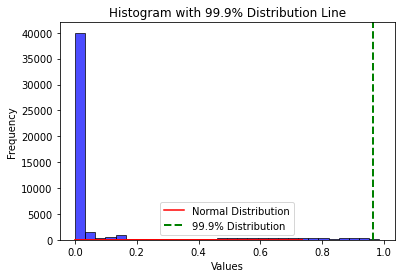

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generate sample data (replace this with your own list of values)
data = likelihoodlist

# Create histogram
plt.hist(data, bins=30,  alpha=0.7, color='blue', edgecolor='black')

# Calculate mean and standard deviation for the data
mean = np.mean(data)
std_dev = np.std(data)

# Create a range of values for x-axis based on the mean and standard deviation
x = np.linspace(0, mean + 3 * std_dev, 100)

# Plot the normal distribution curve (PDF) based on the mean and standard deviation
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', label='Normal Distribution')

# Calculate the values for the 95% distribution (replace 0.025 and 0.975 if you need a different confidence interval)

upper_bound = np.percentile(data, 99.9)

# Plot vertical lines for the 95% distribution
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='99.9% Distribution')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with 99.9% Distribution Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [43]:
compare

0.9845637738620864

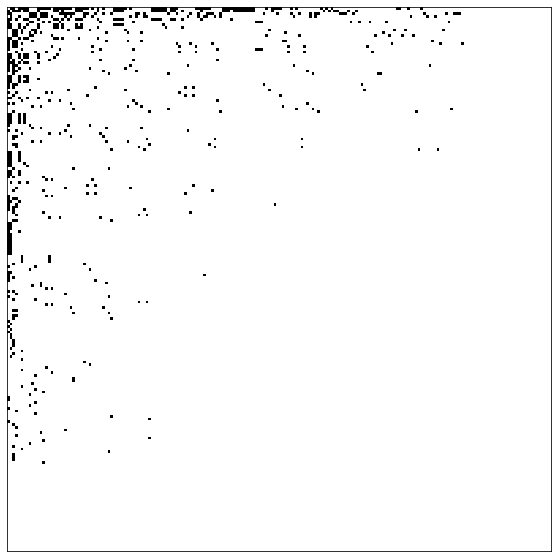

In [44]:
G=nx.from_numpy_array(np.array(simutable[8][46][10]))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

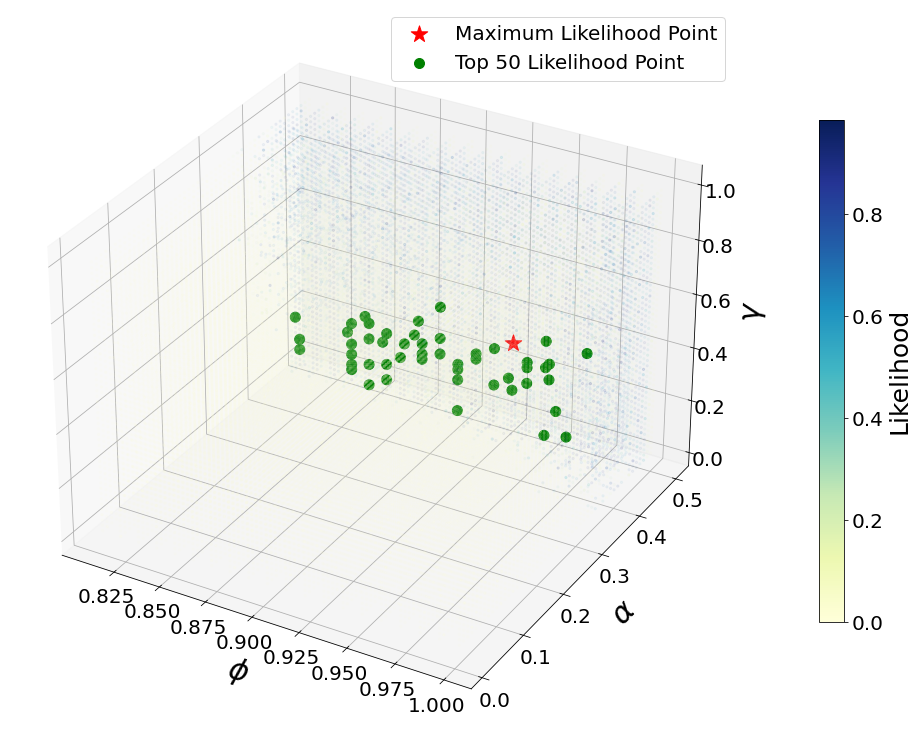

In [29]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.81, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Replace this line with your actual likelihoodlist
likelihoodlist = np.array(likelihoodlist)

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = likelihoodlist.flatten()

# Calculate alpha (transparency) based on likelihood values
alpha_values = 0.05 + 0.1 * (likelihood_flat - np.min(likelihood_flat)) / (np.max(likelihood_flat) - np.min(likelihood_flat))

# Scatter plot with colors and transparency
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.', alpha=alpha_values)

# Set labels for each axis

ax.set_xlabel(r'$\phi$',fontsize=30, labelpad=15)
ax.set_ylabel(r'$\alpha$',fontsize=30, labelpad=15)
ax.set_zlabel(r'$\gamma$',fontsize=30, labelpad=15)

# Set tick parameters for each axis with adjusted font size
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)



# Add colorbar with adjusted font size
cbar = fig.colorbar(p, ax=ax, cmap='YlGnBu', fraction=0.03, pad=0.1)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Likelihood', fontsize=25)

# Find indices of the largest 1 points
indices_largest_1 = np.argpartition(likelihood_flat, -1)[-1:]

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_largest_1], y_flat[indices_largest_1], z_flat[indices_largest_1],
           c='red', s=300, marker='*', label='Maximum Likelihood Point', alpha=1.0)

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -50)[-50:]

indices_low= np.setdiff1d(np.argpartition(likelihood_flat, -50)[-50:],indices_largest_1)

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_low], y_flat[indices_low], z_flat[indices_low],
           c='green', s=100, marker='o', label='Top 50 Likelihood Point', alpha=1.0)


# Show the legend
ax.legend(fontsize=20)
#fig.text(0.5, 0.15, 'Simulated Networks of Size 200', ha='center', fontsize=25)
plt.savefig('figure4_3.pdf', format='pdf')

plt.show()

In [ ]:
np.mean(x_flat[indices_largest])

In [ ]:
np.mean(y_flat[indices_largest])

In [ ]:
np.mean(z_flat[indices_largest])

In [ ]:
np.std(x_flat[indices_largest])

In [ ]:
np.std(y_flat[indices_largest])

In [ ]:
np.std(z_flat[indices_largest])

In [49]:
x_flat[indices_largest]

array([0.9 , 0.81, 0.89, 0.91, 0.95, 0.87, 0.83, 0.85, 0.94, 0.81, 0.91,
       0.84, 0.92, 0.83, 0.96, 0.81, 1.  , 0.83, 0.93, 0.87, 0.87, 0.88,
       0.94, 0.92, 0.82, 1.  , 0.93, 0.88, 0.88, 0.82, 0.83, 0.97, 0.84,
       0.96, 0.84, 0.87, 0.92, 0.82, 0.98, 0.89, 0.83, 0.96, 0.96, 1.  ,
       0.89, 0.86, 0.91, 0.86, 0.88, 0.84])

In [50]:
y_flat[indices_largest]

array([0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47,
       0.47, 0.46, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47,
       0.47, 0.47, 0.47, 0.46, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47,
       0.47, 0.47, 0.46, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47, 0.47,
       0.47, 0.47, 0.47, 0.47, 0.47, 0.47])

In [51]:
z_flat[indices_largest]

array([0.82, 0.82, 0.4 , 0.9 , 0.8 , 0.54, 0.44, 0.86, 0.78, 0.54, 0.52,
       0.78, 0.5 , 1.  , 0.74, 0.7 , 0.48, 0.82, 0.96, 0.32, 0.98, 0.86,
       0.4 , 0.76, 0.56, 0.58, 0.72, 0.88, 0.78, 0.38, 0.7 , 0.86, 0.76,
       0.68, 0.62, 0.8 , 0.68, 0.44, 0.84, 0.94, 0.36, 0.6 , 0.94, 0.72,
       0.52, 0.78, 0.64, 0.66, 0.82, 0.58])

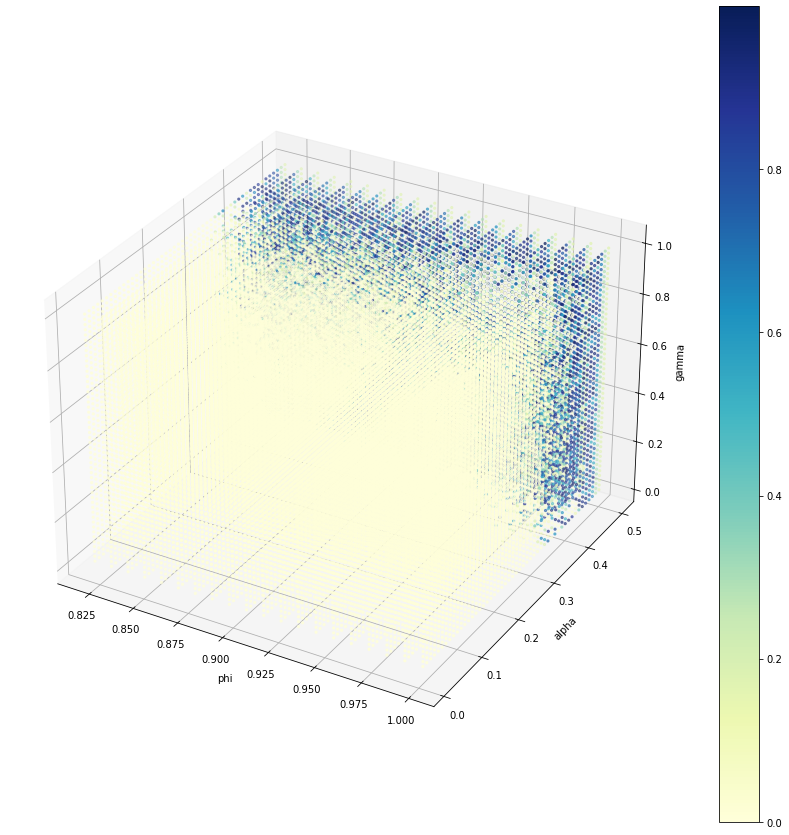

In [52]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.82, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')


# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = np.array(likelihoodlist).flatten()

# Scatter plot with colors from likelihoodlist
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat,cmap='YlGnBu', marker='.')

# Set labels for each axis
ax.set_xlabel('phi')
ax.set_ylabel('alpha')
ax.set_zlabel('gamma')

# Add colorbar
fig.colorbar(p, ax=ax, cmap='YlGnBu')


In [12]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = np.linspace(0.81, 1, 20)
y = np.linspace(0.01, 0.5, 50)
z = np.linspace(0.02, 1, 50)

# Create a 3D grid of coordinates using np.meshgrid
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Replace this line with your actual likelihoodlist
likelihoodlist = np.array(likelihoodlist)

# Create 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Flatten the coordinate arrays and likelihood list
x_flat, y_flat, z_flat = X.flatten(), Y.flatten(), Z.flatten()
likelihood_flat = likelihoodlist.flatten()

# Calculate alpha (transparency) based on likelihood values
alpha_values = 0.05 + 0.1 * (likelihood_flat - np.min(likelihood_flat)) / (np.max(likelihood_flat) - np.min(likelihood_flat))

# Scatter plot with colors and transparency
p = ax.scatter(x_flat, y_flat, z_flat, c=likelihood_flat, cmap='YlGnBu', marker='.', alpha=alpha_values)

# Set labels for each axis

ax.set_xlabel('phi',fontsize=20, labelpad=15)
ax.set_ylabel('alpha',fontsize=20, labelpad=15)
ax.set_zlabel('gamma',fontsize=20, labelpad=15)

# Set tick parameters for each axis with adjusted font size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)



# Add colorbar with adjusted font size
cbar = fig.colorbar(p, ax=ax, cmap='YlGnBu', fraction=0.03, pad=0.1)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Likelihood', fontsize=25)

# Find indices of the largest 1 points
indices_largest_1 = np.argpartition(likelihood_flat, -1)[-1:]

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_largest_1], y_flat[indices_largest_1], z_flat[indices_largest_1],
           c='red', s=300, marker='*', label='Maximum Likelihood Point', alpha=1.0)

# Find indices of the largest 10 points
indices_largest = np.argpartition(likelihood_flat, -50)[-50:]

indices_low= np.setdiff1d(np.argpartition(likelihood_flat, -50)[-50:],indices_largest_1)

# Mark the largest points with red color and higher opacity
ax.scatter(x_flat[indices_low], y_flat[indices_low], z_flat[indices_low],
           c='green', s=100, marker='o', label='Top 50 Likelihood Point', alpha=1.0)


# Show the legend
ax.legend(fontsize=15)
fig.text(0.5, 0.15, 'Simulated Networks of Size 100', ha='center', fontsize=25)
plt.savefig('figure4_2.pdf', format='pdf')

plt.show()

NameError: name 'likelihoodlist' is not defined

In [53]:
# statistical plotting

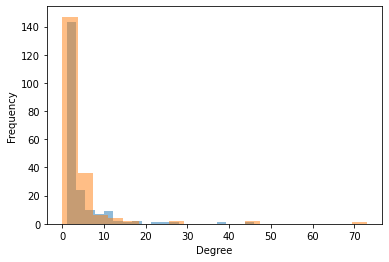

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = [degree for node, degree in G1.degree()]
degree_dist_G2 = [degree for node, degree in G2.degree()]

# Plot degree distributions
plt.hist(degree_dist_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(degree_dist_G2, bins=20, alpha=0.5, label='Network Optimization')

#plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
#plt.legend()
plt.savefig('figure5_200_1.pdf', format='pdf')
plt.show()

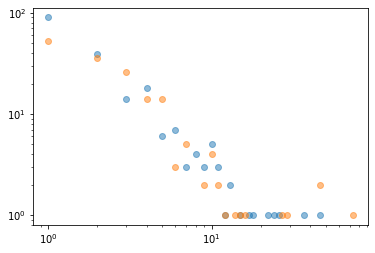

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 =  G_empirical  # Replace this with your actual data for the first network
G2 = G   # Replace this with your actual data for the second network

# Calculate degree distributions
degree_dist_G1 = dict(Counter(dict(G1.degree()).values()))
degree_dist_G2 = dict(Counter(dict(G2.degree()).values()))

# Create scatter plot
plt.scatter(degree_dist_G1.keys(), degree_dist_G1.values(), alpha=0.5, label='Network Empirical')
plt.scatter(degree_dist_G2.keys(), degree_dist_G2.values(), alpha=0.5, label='Network Optimization')


plt.xscale('log')
plt.yscale('log')

#plt.title('Scatter Plot of Degree Frequencies')
#plt.xlabel('Log Degree')
#plt.ylabel('Log Frequency')
#plt.legend()
plt.savefig('figure5_200_2.pdf', format='pdf')
plt.show()

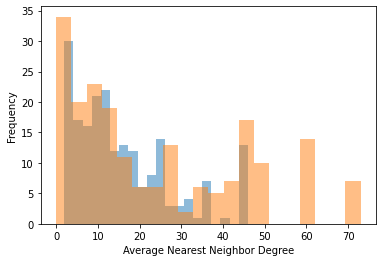

In [81]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate average nearest neighbor degrees
avg_nn_degree_G1 = list(nx.average_neighbor_degree(G1).values())
avg_nn_degree_G2 = list(nx.average_neighbor_degree(G2).values())

# Plot histograms
plt.hist(avg_nn_degree_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(avg_nn_degree_G2, bins=20, alpha=0.5, label='Network Optimization')

#plt.title('Average Nearest Neighbor Degree Distribution')
plt.xlabel('Average Nearest Neighbor Degree')
plt.ylabel('Frequency')
#plt.legend()
plt.savefig('figure5_200_3.pdf', format='pdf')
plt.show()




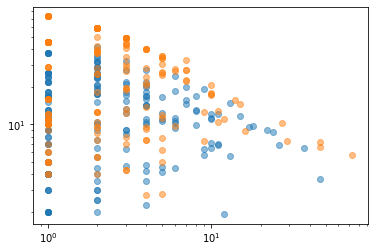

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate degrees and average nearest neighbor degrees
degrees_G1 = dict(G1.degree())
avg_nn_degree_G1 = nx.average_neighbor_degree(G1)

degrees_G2 = dict(G2.degree())
avg_nn_degree_G2 = nx.average_neighbor_degree(G2)

# Extract values for scatter plot
x_values_G1 = list(degrees_G1.values())
y_values_G1 = list(avg_nn_degree_G1.values())

x_values_G2 = list(degrees_G2.values())
y_values_G2 = list(avg_nn_degree_G2.values())

# Create scatter plot
plt.scatter(x_values_G1, y_values_G1, alpha=0.5, label='Network Empirical')
plt.scatter(x_values_G2, y_values_G2, alpha=0.5, label='Network Optimization')

plt.xscale('log')
plt.yscale('log')

#plt.title('Scatter Plot of Degree vs. Average Nearest Neighbor Degrees')
#plt.xlabel('Log Degree')
#plt.ylabel('Log Average Nearest Neighbor Degree')
#plt.legend()
plt.savefig('figure5_200_4.pdf', format='pdf')
plt.show()



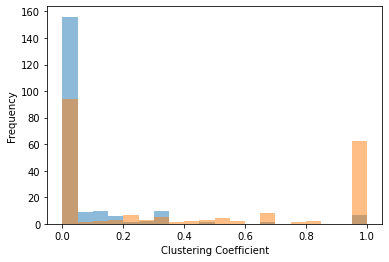

In [83]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical  # Replace this with your actual data for the first network
G2 = G # Replace this with your actual data for the second network

# Calculate clustering coefficients
clustering_G1 = list(nx.clustering(G1).values())
clustering_G2 = list(nx.clustering(G2).values())

# Plot histograms
plt.hist(clustering_G1, bins=20, alpha=0.5, label='Network Empirical')
plt.hist(clustering_G2, bins=20, alpha=0.5, label='Network Optimization')

#plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
#plt.legend()
plt.savefig('figure5_200_5.pdf', format='pdf')
plt.show()


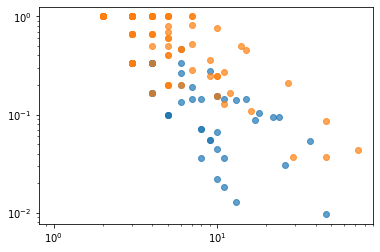

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate or load your two networks (G1 and G2)
# For simplicity, let's create two random graphs for illustration purposes
G1 = G_empirical # Replace this with your actual data for the first network
G2 = G  # Replace this with your actual data for the second network

# Calculate clustering coefficients and node degrees
clustering_G1 = nx.clustering(G1)
clustering_G2 = nx.clustering(G2)

degrees_G1 = dict(G1.degree())
degrees_G2 = dict(G2.degree())

# Extract values for plotting
nodes_G1, coefficients_G1 = zip(*clustering_G1.items())
nodes_G2, coefficients_G2 = zip(*clustering_G2.items())

degrees_values_G1 = [degrees_G1[node] for node in nodes_G1]
degrees_values_G2 = [degrees_G2[node] for node in nodes_G2]

# Plot scatter plot with x-axis as node degree
plt.scatter(degrees_values_G1, coefficients_G1, label='Network Empirical', alpha=0.7)
plt.scatter(degrees_values_G2, coefficients_G2, label='Network Optimization', alpha=0.7)

plt.xscale('log')
plt.yscale('log')


#plt.title('Clustering Coefficient vs Node Degree Scatter Plot')
#plt.xlabel('Log Node Degree')
#plt.ylabel('Log Clustering Coefficient')
#plt.legend()
plt.savefig('figure5_200_6.pdf', format='pdf')
plt.show()

